In [1]:
%store -r __import

In [2]:
__import

# Diary

### 10/10
Initial EDA. Seen the percentage for some columns, possibly I will use PandasProfiling. Furthermore, I need to explore more relations between the features, check correlations and variance.
Another important point is ask questions that are more complex, such as: given a user, what was the questions he questioned more, whats the connection between the contet and if the question was answered correctly.

In [3]:
train_df = pd.read_feather('/home/tuts/datasets/riid/train_raw')

In [4]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,1.0
1,1,56943,115,5716,0,2,2,1,37000.0,0.0
2,2,118363,115,128,0,0,0,1,55000.0,0.0
3,3,131167,115,7860,0,3,0,1,19000.0,0.0
4,4,137965,115,7922,0,4,1,1,11000.0,0.0


In [5]:
train_df.drop('row_id', inplace=True, axis=1)

In [6]:
train_df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,1.0
1,56943,115,5716,0,2,2,1,37000.0,0.0
2,118363,115,128,0,0,0,1,55000.0,0.0
3,131167,115,7860,0,3,0,1,19000.0,0.0
4,137965,115,7922,0,4,1,1,11000.0,0.0


### 393_656 unique users

In [7]:
train_df.user_id.nunique()

393656

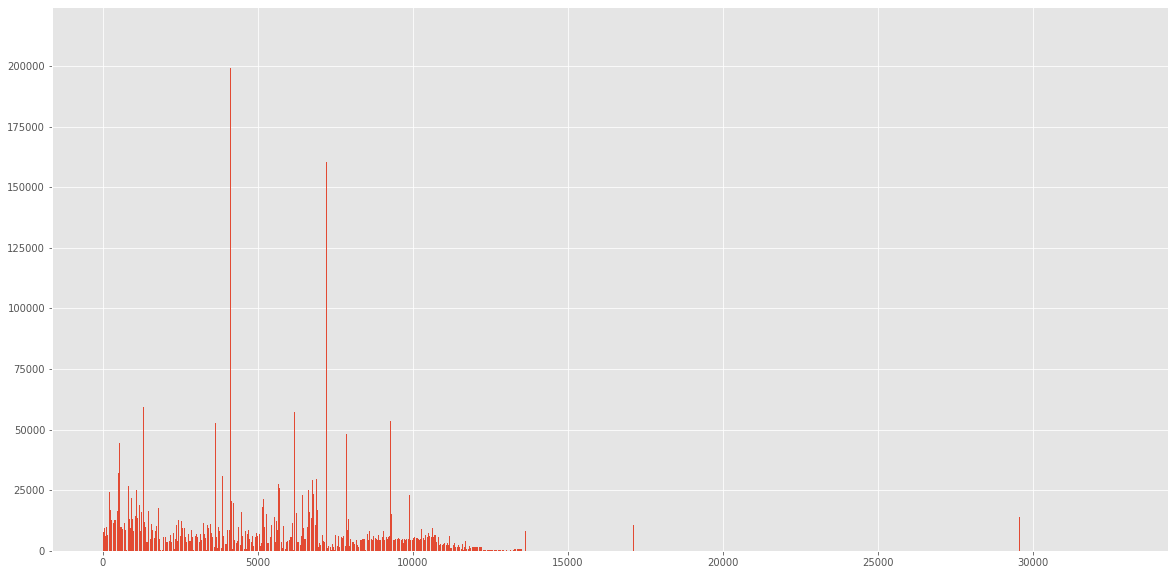

In [9]:
xy = train_df.content_id.value_counts()

plt.figure(figsize=(20,10))
plt.bar(x=xy.index, height=xy.values);

### 98% of the content type is a question being posed by the user

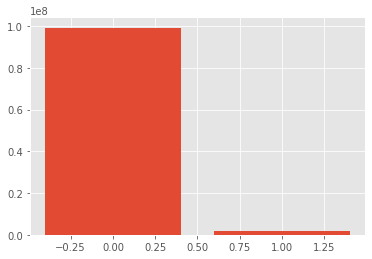

In [10]:
content_type = train_df.content_type_id.value_counts()
plt.bar(x=content_type.index, height=content_type.values);

In [11]:
content_type

0    99271300
1     1959032
Name: content_type_id, dtype: int64

In [13]:
content_type[0]/train_df.shape[0]

0.9806477765972357

### Percentage of right and wrong answers, respectively:

In [15]:
correct_answers = train_df.answered_correctly.value_counts()

In [19]:
correct_answers[1]/(correct_answers[1] + correct_answers[0])

0.6572355454194717

In [20]:
correct_answers[0]/(correct_answers[1] + correct_answers[0])

0.3427644545805283

In [21]:
train_df.sort_values(by=['timestamp'], inplace=True)

In [22]:
train_df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
98438531,-2147483620,2088557577,5607,0,433,1,0,97000.0,1.0
21166816,-2147483540,454209366,3782,0,670,1,1,45000.0,1.0
24508604,-2147483434,524304795,787,0,279,3,1,17000.0,1.0
42390797,-2147483407,898811007,324,0,1934,3,1,18000.0,1.0
64797750,-2147483364,1377493489,5721,0,1943,0,1,45000.0,1.0


In [24]:
train_df.reset_index()

,index,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,98438531,-2147483620,2088557577,5607,0,433,1,0,97000.0,1.0
1,21166816,-2147483540,454209366,3782,0,670,1,1,45000.0,1.0
2,24508604,-2147483434,524304795,787,0,279,3,1,17000.0,1.0
3,42390797,-2147483407,898811007,324,0,1934,3,1,18000.0,1.0
4,64797750,-2147483364,1377493489,5721,0,1943,0,1,45000.0,1.0
...,...,...,...,...,...,...,...,...,...,...
101230327,35458701,2147483396,758135092,10660,0,422,1,1,21000.0,1.0
101230328,93771300,2147483560,1991171554,1814,0,1227,3,1,26000.0,1.0
101230329,93771299,2147483560,1991171554,1816,0,1227,1,1,26000.0,1.0
101230330,93771298,2147483560,1991171554,1815,0,1227,0,1,26000.0,1.0


In [26]:
train_df.to_feather('/home/tuts/datasets/riid/train_ordered')

ValueError: feather does not support serializing a non-default index for the index; you can .reset_index() to make the index into column(s)